In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels1 = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 1, 1.1, 1.2, 1.3]
labels2 = [
    1.4,
    1.5,
    1.6,
    1.7,
    1.8,
    1.9,
    2,
    2.1,
    2.2,
    2.3,
]
labels3 = [2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3]
df = []
masses = []
pred = float(input("What is the mass"))
if 0 < pred < 1.4:
    labels = labels1
elif 1.3 < pred < 2.1:
    labels = labels2
elif 2 < pred <= 3:
    labels = labels3


for label in labels:
    masses += [label]
    df += [pd.read_csv(f"{label}.data", sep="\s+")]
masses = np.array(masses)

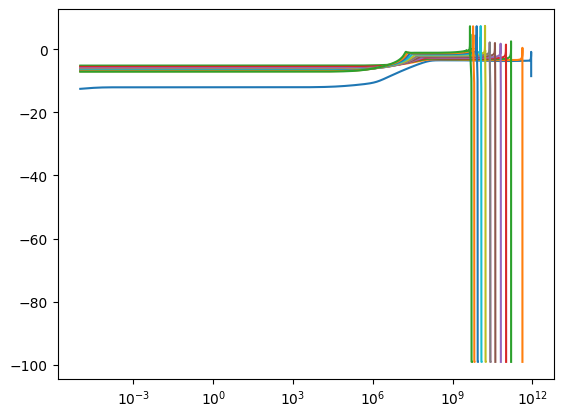

In [99]:
plt.xscale("log")
for d in df:
    plt.plot(d["star_age"], d["log_Lneu"])


In [100]:
ages = []
lums = []
for d in df:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages += [d["star_age"]]
    lums += [d["log_Lneu"]]

min_length = min(len(lum) for lum in lums)
ages = np.log([age[:min_length] for age in ages])
lums = np.array([lum[:min_length] for lum in lums])

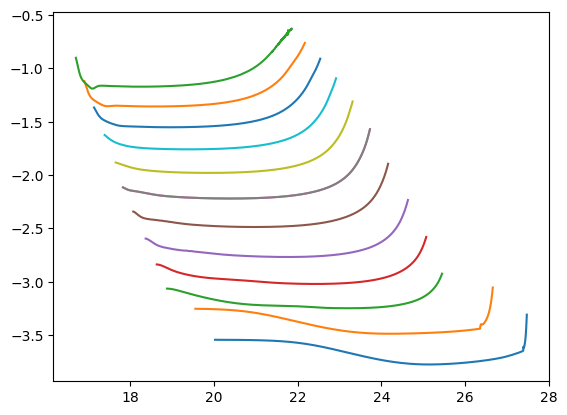

In [101]:
for a, l, label in zip(ages, lums, labels):
    plt.plot(a, l, label=label)
# plt.xscale("log")

In [102]:
print(masses.shape)
print(ages.shape)
print(lums.shape)

(13,)
(13, 1046)
(13, 1046)


In [103]:
from sklearn.linear_model import LinearRegression as LnR

output = np.array(
    [
        *(i for z in zip(ages.T, lums.T) for i in z),
    ]
).T
print(output.shape)
model = LnR()
model.fit(np.array([masses]).T, output)

(13, 2092)


LinearRegression()

(1, 2092)


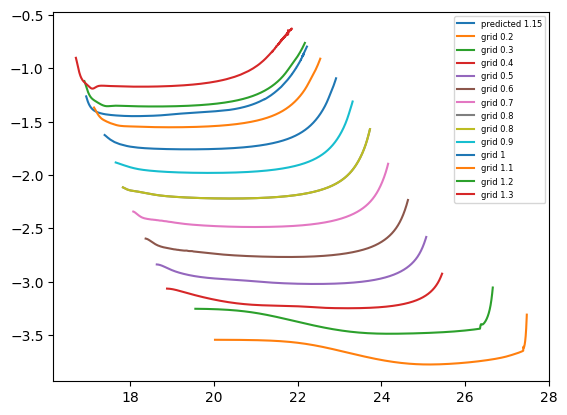

In [108]:
pred = 1.15

# n = -2
# prediction = model.predict([[masses[n]]])
prediction = model.predict([[pred]])
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

plt.plot(predicted_ages[0], predicted_lums[0], label=f"predicted {pred}")

# plt.plot(ages[n], lums[n], label="real")
# plt.plot(ages[1], lums[1], label="grid")
# plt.plot(ages[2], lums[2], label="grid 0.4")
# plt.xscale("log")

for i,label in enumerate(labels):
    plt.plot(ages[i], lums[i], label=f"grid {label}")

    
plt.legend(fontsize=6)
